In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('merged.csv')
df.head()

,SCR_Citation,INSC_Citation,Case_Title,Date,Bench,Issue_for_Consideration,Headnotes,Case_Law_Cited,List_of_Acts,List_of_Keywords,Case_Arising_From,Appearances_for_Parties,Judgment_Order,Source_File
0,[2024] 10 S.C.R. 108 : 2024 INSC 735,2024 INSC 735,Vijay Singh @ Vijay Kr. Sharma v. The State of...,25 September 2024,"[Bela M. Trivedi and Satish Chandra Sharma,* JJ.]",Issue arose as regards sustainablility of the ...,"Penal Code, 1860 – ss. 302/34 and 364/34 – Kid...",State of Goa v. Sanjay Thakran [2007] 3 SCR 50...,"Penal Code, 1860.",Abduction; Murder; Abduction and murder of wom...,CRIMINAL APPELLATE JURISDICTION: Criminal Appe...,"R. K. Dash, Sr. Adv., Ms. Fauzia Shakil, Amit ...",Judgment / Order of the Supreme Court\nJudgmen...,D:\Aashin\Sem 7\FYP Project\2024\2024_10_108_1...
1,[2024] 10 S.C.R. 1313 : 2024 INSC 755,2024 INSC 755,Rama Devi v. The State of Bihar and Others,03 October 2024,"[Sanjiv Khanna,* Sanjay Kumar and R. Mahadevan...",Whether the High Court was justified in revers...,"Penal Code, 1860 – ss.302, 307, read with s.34...",Deep Chand and Others v. State of Haryana (196...,"Penal Code, 1860; Code of Criminal Procedure, ...",Murder; Member of the Legislative Assembly; ML...,CRIMINAL APPELLATE JURISDICTION: Criminal Appe...,"Tushar Mehta, Solicitor General, K M Nataraj, ...",Judgment / Order of the Supreme Court\nJudgmen...,D:\Aashin\Sem 7\FYP Project\2024\2024_10_1313_...
2,[2024] 10 S.C.R. 1344 : 2024 INSC 763,2024 INSC 763,Shashi Bhushan Prasad Singh v. The State of Bi...,04 October 2024,"[Bela M. Trivedi and Satish Chandra Sharma,* JJ.]",Despite the preparation of the Final Select Li...,Bihar Water Resources Department Subordinate E...,Bharathidasan University & Anr. v. AICTE & Ors...,Bihar Water Resources Department Subordinate E...,Service Law; Recruitment; Appointment; Changin...,CIVIL APPELLATE JURISDICTION: Civil Appeal No....,"Ms. Meenakshi Arora, Dr. Rajeev Dhavan, P. S. ...",Judgment / Order of the Supreme Court\nJudgmen...,D:\Aashin\Sem 7\FYP Project\2024\2024_10_1344_...
3,[2024] 10 S.C.R. 1359 : 2024 INSC 773,2024 INSC 773,Renjith K.G. & Others v. Sheeba,14 October 2024,"[Pankaj Mithal and R. Mahadevan,* JJ.]","Whether a pendente lite transferee, a stranger...","Code of Civil Procedure, 1908 – Or.XXI, r.99 –...",Chiranji Lal (D) by LRs. v. Hari Das (D) by Lr...,"Code of Civil Procedure, 1908; Limitation Act,...",Order XXI Rule 99 of the Code of Civil Procedu...,CIVIL APPELLATE JURISDICTION : Civil Appeal No...,"Rajeev Mishra, Sanand Ramakrishnan, Thomas Mar...",Judgment / Order of the Supreme Court\nJudgmen...,D:\Aashin\Sem 7\FYP Project\2024\2024_10_1359_...
4,[2024] 10 S.C.R. 1371 : 2024 INSC 780,2024 INSC 780,IDBI Bank Ltd. v. Ramswaroop Daliya and Ors.,16 October 2024,"[Pankaj Mithal* and R. Mahadevan, JJ.]",Whether there was any default on part of the r...,"Security Interest (Enforcement) Rules, 2002 – ...",Union Bank of India v. Rajat Infrastructure Pr...,"Security Interest (Enforcement) Rules, 2002.",E-auction; Auction sale; Auction purchasers; D...,CIVIL APPELLATE JURISDICTION: Civil Appeal Nos...,"Krishan Kumar, Nitin, Seemant K. Garg, Advs. f...",Judgment / Order of the Supreme Court\nJudgmen...,D:\Aashin\Sem 7\FYP Project\2024\2024_10_1371_...


In [6]:
df['List_of_Acts'].unique()

array(['Penal Code, 1860.',
       'Penal Code, 1860; Code of Criminal Procedure, 1973; Arms Act, \n1959.',
       'Bihar Water Resources Department Subordinate Engineering (Civil) \nCadre Recruitment Rules, 2015; Bihar Water Resources Department \n1346\x08\n[2024] 10 S.C.R.\nDigital Supreme Court Reports\nSubordinate Engineering (Civil) Cadre Recruitment (Amendment) \nRules 2017; All-India Council of Technical Education Act 1987.',
       'Code of Civil Procedure, 1908; Limitation Act, 1963.',
       'Security Interest (Enforcement) Rules, 2002.',
       'Patna Municipal Corporation Act, 1951; Bihar Municipal Act, \n2007; Bihar and Orissa Public Demands Recovery Act, 1914; \nPatna Municipal Corporation (Grant of Permission for Display of \nAdvertisements & Similar Devices) Regulations, 2012.',
       'Penal Code, 1860; Prisons (Bombay Furlough and Parole) Rules, \n1959; Code of Criminal Procedure, 1973; Constitution of India; \nBharatiya Nagarik Suraksha Sanhita, 2023.',
       'Prote

In [7]:
import re
import pandas as pd

# ----- cleaning helpers -----
SCR_NOISE = [
    r"\[\s*20\d{2}\s*\]\s*\d+\s*S\.C\.R\.",      # [2024] 10 S.C.R.
    r"Digital\s+Supreme\s+Court\s+Reports",
    r"Supreme\s+Court\s+Reports",
    r"\x08",                                     # stray control char
    r"\b\d{1,4}\s*\n",                           # page markers like "1759\n"
]
def clean_text(s: str) -> str:
    if pd.isna(s): return ""
    t = str(s).replace("\r", " ").replace("\n", " ")
    for pat in SCR_NOISE:
        t = re.sub(pat, " ", t, flags=re.I)
    t = re.sub(r"\s{2,}", " ", t).strip(" ;,.- ")
    return t

# ----- canonical label patterns (extend as you like) -----
CANONICAL_PATTERNS = {
    "IPC": [
        r"\b(Indian\s+)?Penal\s+Code\s*,?\s*1860\b", r"\bIPC\b",
        r"\bBharatiya\s+Nyaya\s+Sanhita\s*,?\s*2023\b",
    ],
    "CrPC": [r"\b(Code\s+of\s+)?Criminal\s+Procedure\s*,?\s*1973\b", r"\bCrPC\b"],
    "BNSS": [r"\bBharatiya\s+Nagarik\s+Suraksha\s+Sanhita\s*,?\s*2023\b"],
    "IEA":  [r"\b(Indian\s+)?Evidence\s+Act\s*,?\s*1872\b"],
    "Constitution": [r"\bConstitution of India\b"],
    "NIAct": [r"\bNegotiable\s+Instruments?\s+Act\s*,?\s*1881\b"],
    "NDPS": [r"\bNarcotic[s]?\s+Drugs\s+and\s+Psychotropic\s+Substances\s+Act\s*,?\s*1985\b", r"\bNDPS\b"],
    "ArmsAct": [r"\bArms\s+Act\s*,?\s*(1959|1950)\b"],
    "POCSO": [r"\bProtection\s+of\s+Children\s+from\s+Sexual\s+Offences\s+Act\s*,?\s*2012\b", r"\bPOCSO\b"],
    "SCST": [r"\bScheduled\s+Castes?\s+and\s+Scheduled\s+Tribes?\s+\(Prevention\s+of\s+Atrocities\)\s+Act\s*,?\s*1989\b"],
    "PCAct": [r"\bPrevention\s+of\s+Corruption\s+Act\s*,?\s*(1988|1947)\b"],
    "PMLA": [r"\bPrevention\s+of\s+Money\s+Laundering\s+Act\s*,?\s*2002\b", r"\bPMLA\b"],
    "IBCode": [r"\bInsolvency\s+and\s+Bankruptcy\s+Code\s*,?\s*2016\b"],
    "Companies": [r"\bCompanies\s+Act\s*,?\s*(1956|2013)\b"],
    "CPC": [r"\bCode\s+of\s+Civil\s+Procedure\s*,?\s*1908\b", r"\bCPC\b"],
    "MVAct": [r"\bMotor\s+Vehicles?\s+Act\s*,?\s*1988\b"],
    "ArbAct": [r"\bArbitration\s+and\s+Conciliation\s+Act\s*,?\s*1996\b", r"\bArbitration\s+Act\s*,?\s*1940\b"],
    "DVAct": [r"\bProtection\s+of\s+Women\s+from\s+Domestic\s+Violence\s+Act\s*,?\s*2005\b"],
    "HMA": [r"\bHindu\s+Marriage\s+Act\s*,?\s*1955\b"],
    "HSA": [r"\bHindu\s+Succession\s+Act\s*,?\s*1956\b"],
}
# precompile
CANONICAL_PATTERNS = {
    k: [re.compile(p, re.I) for p in v] for k, v in CANONICAL_PATTERNS.items()
}

# wide “any instrument” pattern to collect long-tail acts/rules as text
GENERIC_INSTRUMENT_RE = re.compile(
    r"\b([A-Z][A-Za-z\-\&\.\'() ]+?)\s+(Act|Code|Rules|Regulations|Order|Ordinance|Scheme|Guidelines)\s*,?\s*(\d{3,4}[A-Z]?|\d{4})?\b",
    re.I
)
SPECIAL_TITLES = [re.compile(r"\bConstitution of India\b", re.I)]

def extract_labels_and_other(cleaned: str):
    labels = set()
    for lab, pats in CANONICAL_PATTERNS.items():
        if any(p.search(cleaned) for p in pats):
            labels.add(lab)
    # long-tail collection
    others = set(m.group(0).strip(" ;,.- ") for m in GENERIC_INSTRUMENT_RE.finditer(cleaned))
    for sp in SPECIAL_TITLES:
        for m in sp.finditer(cleaned):
            others.add(m.group(0))
    return sorted(labels), sorted(others)


In [8]:
# Example: make a small df from your array; skip if you already have df
# df = pd.DataFrame({"acts_raw": your_list_or_series})

# Clean just this column
df["List_of_Acts_Processed"] = df["List_of_Acts"].astype(str).map(clean_text)

# Extract label lists + other_acts
tmp = df["List_of_Acts_Processed"].apply(lambda s: pd.Series(extract_labels_and_other(s), index=["labels_list", "other_acts_list"]))

df = pd.concat([df, tmp], axis=1)

# One-hot columns for canonical labels (only the ones seen)
all_labels = sorted({lab for labs in df["labels_list"] for lab in (labs or [])})
for lab in all_labels:
    df[lab] = df["labels_list"].apply(lambda labs: int(lab in (labs or [])))

# (Optional) convenience string columns
df["labels_joined"] = df["labels_list"].apply(lambda x: "|".join(x) if x else "")
df["other_acts_joined"] = df["other_acts_list"].apply(lambda x: " | ".join(x) if x else "")


In [9]:
df.head()

,SCR_Citation,INSC_Citation,Case_Title,Date,Bench,Issue_for_Consideration,Headnotes,Case_Law_Cited,List_of_Acts,List_of_Keywords,...,IPC,MVAct,NDPS,NIAct,PCAct,PMLA,POCSO,SCST,labels_joined,other_acts_joined
0,[2024] 10 S.C.R. 108 : 2024 INSC 735,2024 INSC 735,Vijay Singh @ Vijay Kr. Sharma v. The State of...,25 September 2024,"[Bela M. Trivedi and Satish Chandra Sharma,* JJ.]",Issue arose as regards sustainablility of the ...,"Penal Code, 1860 – ss. 302/34 and 364/34 – Kid...",State of Goa v. Sanjay Thakran [2007] 3 SCR 50...,"Penal Code, 1860.",Abduction; Murder; Abduction and murder of wom...,...,1,0,0,0,0,0,0,0,IPC,"Penal Code, 1860"
1,[2024] 10 S.C.R. 1313 : 2024 INSC 755,2024 INSC 755,Rama Devi v. The State of Bihar and Others,03 October 2024,"[Sanjiv Khanna,* Sanjay Kumar and R. Mahadevan...",Whether the High Court was justified in revers...,"Penal Code, 1860 – ss.302, 307, read with s.34...",Deep Chand and Others v. State of Haryana (196...,"Penal Code, 1860; Code of Criminal Procedure, ...",Murder; Member of the Legislative Assembly; ML...,...,1,0,0,0,0,0,0,0,ArmsAct|CrPC|IPC,"Arms Act, 1959 | Penal Code, 1860"
2,[2024] 10 S.C.R. 1344 : 2024 INSC 763,2024 INSC 763,Shashi Bhushan Prasad Singh v. The State of Bi...,04 October 2024,"[Bela M. Trivedi and Satish Chandra Sharma,* JJ.]",Despite the preparation of the Final Select Li...,Bihar Water Resources Department Subordinate E...,Bharathidasan University & Anr. v. AICTE & Ors...,Bihar Water Resources Department Subordinate E...,Service Law; Recruitment; Appointment; Changin...,...,0,0,0,0,0,0,0,0,,All-India Council of Technical Education Act 1...
3,[2024] 10 S.C.R. 1359 : 2024 INSC 773,2024 INSC 773,Renjith K.G. & Others v. Sheeba,14 October 2024,"[Pankaj Mithal and R. Mahadevan,* JJ.]","Whether a pendente lite transferee, a stranger...","Code of Civil Procedure, 1908 – Or.XXI, r.99 –...",Chiranji Lal (D) by LRs. v. Hari Das (D) by Lr...,"Code of Civil Procedure, 1908; Limitation Act,...",Order XXI Rule 99 of the Code of Civil Procedu...,...,0,0,0,0,0,0,0,0,CPC,"Limitation Act, 1963"
4,[2024] 10 S.C.R. 1371 : 2024 INSC 780,2024 INSC 780,IDBI Bank Ltd. v. Ramswaroop Daliya and Ors.,16 October 2024,"[Pankaj Mithal* and R. Mahadevan, JJ.]",Whether there was any default on part of the r...,"Security Interest (Enforcement) Rules, 2002 – ...",Union Bank of India v. Rajat Infrastructure Pr...,"Security Interest (Enforcement) Rules, 2002.",E-auction; Auction sale; Auction purchasers; D...,...,0,0,0,0,0,0,0,0,,"Security Interest (Enforcement) Rules, 2002"


In [10]:
df['List_of_Acts_Processed']

,List_of_Acts_Processed
0,"Penal Code, 1860"
1,"Penal Code, 1860; Code of Criminal Procedure, ..."
2,Bihar Water Resources Department Subordinate E...
3,"Code of Civil Procedure, 1908; Limitation Act,..."
4,"Security Interest (Enforcement) Rules, 2002"
...,...
736,"Prevention of Money Laundering Act, 2002; Maha..."
737,"Penal Code, 1860; Constitution of India"
738,"Constitution of India; Contract Act, 1872"
739,"Code of Civil Procedure, 1908; Benami Transact..."


In [11]:
df['List_of_Keywords']

,List_of_Keywords
0,Abduction; Murder; Abduction and murder of wom...
1,Murder; Member of the Legislative Assembly; ML...
2,Service Law; Recruitment; Appointment; Changin...
3,Order XXI Rule 99 of the Code of Civil Procedu...
4,E-auction; Auction sale; Auction purchasers; D...
...,...
736,Commodity Exchange Platform; National Spot Exc...
737,Voluntarily causing grievous hurt by using aci...
738,Education; Law education; Common Law Admission...
739,Maintainability of suit; Benami transaction; J...


In [12]:
import pandas as pd, numpy as np, re

# adapt the path if needed
df = pd.read_csv("merged.csv")

# name of the messy column
COL = "List_of_Acts"

df[COL] = df[COL].astype(str)
df[[COL]].head(3)


,List_of_Acts
0,"Penal Code, 1860."
1,"Penal Code, 1860; Code of Criminal Procedure, ..."
2,Bihar Water Resources Department Subordinate E...


In [13]:
CTRL_CHARS = re.compile(r"[\x00-\x1f\x7f-\x9f]")     # control bytes, e.g., \x08
SCR_TAGS   = re.compile(r"\[\d{4}\]\s*\d+\s*S\.C\.R\.")  # [2024] 10 S.C.R.
PAGE_NO    = re.compile(r"\n?\s*\d{1,5}\s*\n?")          # stray page counters like 1759, 2250, etc.
CASE_LINE  = re.compile(r"\b v\. \b| v\. | v\.| vs\.| versus ", flags=re.I)  # case caption joiners

# phrases/headers to drop entirely if they appear as separate fragments
DROP_PHRASES = [
    r"In the Judgment of .*?:",
    r"Digital Supreme Court Reports",
    r"Supreme Court Reports",
    r"Author",
    r"Etc\.",
    r"– ss\.\s*\d+.*",   # section-only lines like "Evidence Act – ss. 17 and 18."
]

DROP_RE = re.compile("|".join(DROP_PHRASES), flags=re.I)

def basic_clean(s: str) -> str:
    s = CTRL_CHARS.sub(" ", s)
    s = s.replace("\u00a0", " ")               # non-breaking space
    s = s.replace("\n", " ")
    s = SCR_TAGS.sub(" ", s)
    s = PAGE_NO.sub(" ", s)
    s = CASE_LINE.sub(" ", s)
    s = DROP_RE.sub(" ", s)
    # normalize weird year punctuation (e.g., "Act, \n1959." or "Act, 1959.")
    s = re.sub(r"\s*,\s*(\d{4})\s*\.", r", \1", s)
    # collapse multiple punctuation/spaces
    s = re.sub(r"[;,\uFF1B]+", lambda m: m.group(0)[0], s)   # unify weird semicolons
    s = re.sub(r"\s{2,}", " ", s).strip(" .;,\t")
    return s


In [14]:
ACT_PATTERN = re.compile(
    r"""(?ix)                                  # ignore case, verbose
    (                                          # capture a whole instrument phrase
      [A-Z][^;,\n]*?                           # starts uppercase, then run to a boundary
      (?:Act|Code|Rules|Regulations|Order|Ordinance|Tariff|Protocol|Scheme|Guidelines|
         Constitution(?:\s+of\s+India)?|Bill|Law)   # instrument keywords
      [^;,\n]*?                                # tail
      (?:,\s*\d{3,4})?                         # optional year
    )
    """
)

def extract_acts(text: str):
    s = basic_clean(text)
    # Priority split on semicolons first (authoritative separators)
    parts = [p.strip(" .,") for p in s.split(";") if p.strip(" .,")]
    tokens = []
    for p in parts:
        # If a part already ends with Act/Code/Rules (±year), keep it;
        # also scan inside the part to catch comma-separated multiple acts.
        found = [m.group(1).strip(" .,") for m in ACT_PATTERN.finditer(p)]
        if found:
            tokens.extend(found)
    # If we somehow didn’t find anything via semicolons, try over the whole string
    if not tokens:
        tokens = [m.group(1).strip(" .,") for m in ACT_PATTERN.finditer(s)]
    # de-dup while preserving order
    seen, out = set(), []
    for t in tokens:
        if t not in seen:
            seen.add(t)
            out.append(t)
    return out

df["acts_array_raw"] = df[COL].fillna("").map(extract_acts)
df[["List_of_Acts", "acts_array_raw"]].head(10)


,List_of_Acts,acts_array_raw
0,"Penal Code, 1860.",[Penal Code]
1,"Penal Code, 1860; Code of Criminal Procedure, ...","[Penal Code, Arms Act]"
2,Bihar Water Resources Department Subordinate E...,[Bihar Water Resources Department Subordinate ...
3,"Code of Civil Procedure, 1908; Limitation Act,...",[Limitation Act]
4,"Security Interest (Enforcement) Rules, 2002.",[Security Interest (Enforcement) Rules]
5,"Patna Municipal Corporation Act, 1951; Bihar M...","[Patna Municipal Corporation Act, Bihar Munici..."
6,"Penal Code, 1860; Prisons (Bombay Furlough and...","[Penal Code, Prisons (Bombay Furlough and Paro..."
7,"Penal Code, 1860.",[Penal Code]
8,Protection of Children from Sexual Offences Ac...,[Protection of Children from Sexual Offences A...
9,"Land Acquisition Act, 1894; Haryana Urban Deve...","[Land Acquisition Act, Haryana Urban Developme..."


In [15]:
def normkey(x: str) -> str:
    """lowercase, remove dots, compress spaces, fix common spelling."""
    x0 = x
    x = x.lower()
    x = x.replace("bhartiya", "bharatiya")
    x = x.replace("andhra pradesh", "ap")  # optional shortener
    x = re.sub(r"[().]", " ", x)
    x = re.sub(r"\s+", " ", x).strip()
    return x

CANON = {
    # Core criminal trio (+ 2023 codes)
    "indian penal code, 1860": "IPC",
    "penal code, 1860": "IPC",
    "ipc, 1860": "IPC",
    "code of criminal procedure, 1973": "CrPC",
    "criminal procedure code, 1973": "CrPC",
    "evidence act, 1872": "IEA",
    "bharatiya nyaya sanhita, 2023": "BNS",
    "bharatiya nagarik suraksha sanhita, 2023": "BNSS",
    "bharatiya sakshya adhiniyam, 2023": "BSA",

    # Frequent central acts
    "protection of children from sexual offences act, 2012": "POCSO 2012",
    "protection of children from sexual offences (amendment) act, 2019": "POCSO Amend 2019",
    "scheduled castes and scheduled tribes (prevention of atrocities) act, 1989": "SC/ST Act 1989",
    "schedule cast and schedule tribe (prevention of atrocities) act, 1989": "SC/ST Act 1989",
    "prevention of corruption act, 1988": "PC Act 1988",
    "prevention of money laundering act, 2002": "PMLA 2002",
    "narcotic drugs and psychotropic substances act, 1985": "NDPS 1985",
    "unlawful activities (prevention) act, 1967": "UAPA 1967",
    "arms act, 1959": "Arms Act 1959",
    "negotiable instruments act, 1881": "NI Act 1881",
    "domestic violence act, 2005": "PWDV Act 2005",
    "protection of woman from domestic violence act, 2005": "PWDV Act 2005",
    "protection of women from domestic violence act, 2005": "PWDV Act 2005",
    "information technology act, 2000": "IT Act 2000",
    "code of civil procedure, 1908": "CPC 1908",
    "constitution of india": "Constitution",
    "transfer of property act, 1882": "TPA 1882",
    "specific relief act, 1963": "Specific Relief 1963",
    "limitation act, 1963": "Limitation 1963",
    "limitation act, 1908": "Limitation 1908",
    "registration act, 1908": "Registration 1908",
    "contract act, 1872": "Contract 1872",
    "indian contract act, 1872": "Contract 1872",
    "companies act, 1956": "Companies 1956",
    "companies act, 2013": "Companies 2013",
    "insolvency and bankruptcy code, 2016": "IBC 2016",
    "arbitration and conciliation act, 1996": "Arb&Conc 1996",
    "sarsai act, 2002": "SARFAESI 2002",
    "securitization and reconstruction of financial assets and enforcement of security interest act, 2002": "SARFAESI 2002",
    "motor vehicles act, 1988": "MV Act 1988",
    "central goods and services tax act, 2017": "CGST 2017",
    "evidence act 1872": "IEA",
    # Add more as they show up in your data…
}

# Lightweight harmonizers for common patterns that differ only slightly in wording
HARMONIZE = [
    (re.compile(r"\bindian penal code\b", re.I), "Indian Penal Code"),
    (re.compile(r"\bpenal code\b", re.I), "Indian Penal Code"),
    (re.compile(r"\bcriminal procedure code\b", re.I), "Code of Criminal Procedure"),
    (re.compile(r"\bcode of criminal procedure\b", re.I), "Code of Criminal Procedure"),
    (re.compile(r"\bevidence act\b", re.I), "Evidence Act"),
    (re.compile(r"\bprotection of women? from domestic violence act\b", re.I), "Protection of Women from Domestic Violence Act"),
]

def soft_normalize(name: str) -> str:
    """Standardize little wording differences before final CANON lookup."""
    s = name
    for patt, repl in HARMONIZE:
        s = patt.sub(repl, s)
    s = re.sub(r"\s+", " ", s).strip(" .")
    # restore ", YYYY" if present
    s = re.sub(r"(Act|Code|Rules|Regulations)(\s*)(,)?(\s*)(\d{4})$", r"\1, \5", s)
    return s

def to_canonical(name: str) -> str:
    s = soft_normalize(name)
    key = normkey(s)
    return CANON.get(key, s)   # fall back to original phrase if unseen

df["acts_array"] = (
    df["acts_array_raw"]
    .apply(lambda arr: [to_canonical(x) for x in arr])
    .apply(lambda arr: sorted(set(arr), key=str))  # unique + sort for consistency
)

df[["acts_array_raw", "acts_array"]].head(10)


,acts_array_raw,acts_array
0,[Penal Code],[Indian Penal Code]
1,"[Penal Code, Arms Act]","[Arms Act, Indian Penal Code]"
2,[Bihar Water Resources Department Subordinate ...,"[All-India Council of Technical Education Act,..."
3,[Limitation Act],[Limitation Act]
4,[Security Interest (Enforcement) Rules],[Security Interest (Enforcement) Rules]
5,"[Patna Municipal Corporation Act, Bihar Munici...","[Bihar Municipal Act, Bihar and Orissa Public ..."
6,"[Penal Code, Prisons (Bombay Furlough and Paro...","[Indian Penal Code, Prisons (Bombay Furlough a..."
7,[Penal Code],[Indian Penal Code]
8,[Protection of Children from Sexual Offences A...,"[Information Technology (Amendment) Act, Infor..."
9,"[Land Acquisition Act, Haryana Urban Developme...","[Haryana Urban Development ity Act, Land Acqui..."


In [16]:
# See most frequent labels we *didn't* collapse to a short canonical token yet:
from collections import Counter
all_raw = Counter([a for row in df["acts_array_raw"] for a in row])
all_final = Counter([a for row in df["acts_array"] for a in row])

unknowns = []
for a,_ in all_final.most_common(300):
    if a not in set(CANON.values()):
        # a is not one of your short canonical values; may still be fine!
        # If you want only longforms that look standard and should be shortened, filter them here.
        pass

# Or, list “near-duplicates” you might want to fold:
candidates = [a for a in all_final if a.lower().startswith(("penal code", "indian penal code", "code of criminal procedure", "evidence act"))]
sorted(candidates)[:25]


['Code of Criminal Procedure',
 'Code of Criminal Procedure (Amendment) Act',
 'Evidence Act',
 'Indian Penal Code']

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df["acts_array"])

# Columns are your canonical labels:
label_names = mlb.classes_
labels_df = pd.DataFrame(Y, columns=label_names, index=df.index)

# Attach back if you like:
df = pd.concat([df, labels_df], axis=1)

print("Num unique labels:", len(label_names))
label_names[:25]


Num unique labels: 685


array(['Abkari Act', 'Adaptation) Act', 'Adaption and Modification order',
       'Administrative Tribunals Act', 'Advocates Act',
       'Airport ity of India Employees (CDA) Regulations',
       'All India Council for Technical Education Act',
       'All India Services (Confidential Rolls) Rules',
       'All India Services (Performance Appraisal Report) Rules',
       'All-India Council of Technical Education Act',
       'All-India Institute of Medical Sciences Act',
       'Aluminium Corporation of India Ltd. (Acquisition and Transfer of Aluminium Undertaking) Act',
       'Amendment Act', 'Amendment) Act', 'Amendment) Ordinance',
       'Andhra Pradesh (Telangana Area) Alienation of State Lands & Land Revenue Rules',
       'Andhra Pradesh (Telangana Area) Land Revenue Act',
       'Andhra Pradesh Electricity Regulatory Commission (Distribution Licence) Regulations',
       'Andhra Pradesh Forest Act', 'Andhra Pradesh Prohibition Act',
       'Andhra Pradesh Re-Organisation Act'

In [18]:
# Spot-check some rows after cleaning
ix = df[df["acts_array"].map(len) > 0].head(10).index
df.loc[ix, [COL, "acts_array"]]


,List_of_Acts,acts_array
0,"Penal Code, 1860.",[Indian Penal Code]
1,"Penal Code, 1860; Code of Criminal Procedure, ...","[Arms Act, Indian Penal Code]"
2,Bihar Water Resources Department Subordinate E...,"[All-India Council of Technical Education Act,..."
3,"Code of Civil Procedure, 1908; Limitation Act,...",[Limitation Act]
4,"Security Interest (Enforcement) Rules, 2002.",[Security Interest (Enforcement) Rules]
5,"Patna Municipal Corporation Act, 1951; Bihar M...","[Bihar Municipal Act, Bihar and Orissa Public ..."
6,"Penal Code, 1860; Prisons (Bombay Furlough and...","[Indian Penal Code, Prisons (Bombay Furlough a..."
7,"Penal Code, 1860.",[Indian Penal Code]
8,Protection of Children from Sexual Offences Ac...,"[Information Technology (Amendment) Act, Infor..."
9,"Land Acquisition Act, 1894; Haryana Urban Deve...","[Haryana Urban Development ity Act, Land Acqui..."


In [19]:
df.head()

,SCR_Citation,INSC_Citation,Case_Title,Date,Bench,Issue_for_Consideration,Headnotes,Case_Law_Cited,List_of_Acts,List_of_Keywords,...,read with Government Regulations,s (Amendment) Act,s (Amendment) Bill,s (Reforms and Amendment) Act,s (Regulation) Act,s (Second Amendment) Act,s Act,s) Act,the Cost and Works Accountants and the Company Secretaries (Amendment) Act,ure and Bottling of Arrack) Rules
0,[2024] 10 S.C.R. 108 : 2024 INSC 735,2024 INSC 735,Vijay Singh @ Vijay Kr. Sharma v. The State of...,25 September 2024,"[Bela M. Trivedi and Satish Chandra Sharma,* JJ.]",Issue arose as regards sustainablility of the ...,"Penal Code, 1860 – ss. 302/34 and 364/34 – Kid...",State of Goa v. Sanjay Thakran [2007] 3 SCR 50...,"Penal Code, 1860.",Abduction; Murder; Abduction and murder of wom...,...,0,0,0,0,0,0,0,0,0,0
1,[2024] 10 S.C.R. 1313 : 2024 INSC 755,2024 INSC 755,Rama Devi v. The State of Bihar and Others,03 October 2024,"[Sanjiv Khanna,* Sanjay Kumar and R. Mahadevan...",Whether the High Court was justified in revers...,"Penal Code, 1860 – ss.302, 307, read with s.34...",Deep Chand and Others v. State of Haryana (196...,"Penal Code, 1860; Code of Criminal Procedure, ...",Murder; Member of the Legislative Assembly; ML...,...,0,0,0,0,0,0,0,0,0,0
2,[2024] 10 S.C.R. 1344 : 2024 INSC 763,2024 INSC 763,Shashi Bhushan Prasad Singh v. The State of Bi...,04 October 2024,"[Bela M. Trivedi and Satish Chandra Sharma,* JJ.]",Despite the preparation of the Final Select Li...,Bihar Water Resources Department Subordinate E...,Bharathidasan University & Anr. v. AICTE & Ors...,Bihar Water Resources Department Subordinate E...,Service Law; Recruitment; Appointment; Changin...,...,0,0,0,0,0,0,0,0,0,0
3,[2024] 10 S.C.R. 1359 : 2024 INSC 773,2024 INSC 773,Renjith K.G. & Others v. Sheeba,14 October 2024,"[Pankaj Mithal and R. Mahadevan,* JJ.]","Whether a pendente lite transferee, a stranger...","Code of Civil Procedure, 1908 – Or.XXI, r.99 –...",Chiranji Lal (D) by LRs. v. Hari Das (D) by Lr...,"Code of Civil Procedure, 1908; Limitation Act,...",Order XXI Rule 99 of the Code of Civil Procedu...,...,0,0,0,0,0,0,0,0,0,0
4,[2024] 10 S.C.R. 1371 : 2024 INSC 780,2024 INSC 780,IDBI Bank Ltd. v. Ramswaroop Daliya and Ors.,16 October 2024,"[Pankaj Mithal* and R. Mahadevan, JJ.]",Whether there was any default on part of the r...,"Security Interest (Enforcement) Rules, 2002 – ...",Union Bank of India v. Rajat Infrastructure Pr...,"Security Interest (Enforcement) Rules, 2002.",E-auction; Auction sale; Auction purchasers; D...,...,0,0,0,0,0,0,0,0,0,0


In [20]:
TEXT_COLS = ["Headnotes", "Issue_for_Consideration", "Case_Title"]  # choose what’s relevant

df["input_text"] = df[TEXT_COLS].fillna("").agg(" ".join, axis=1)


In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df["acts_array"])
print("Labels:", mlb.classes_)


Labels: ['Abkari Act' 'Adaptation) Act' 'Adaption and Modification order'
 'Administrative Tribunals Act' 'Advocates Act'
 'Airport ity of India Employees (CDA) Regulations'
 'All India Council for Technical Education Act'
 'All India Services (Confidential Rolls) Rules'
 'All India Services (Performance Appraisal Report) Rules'
 'All-India Council of Technical Education Act'
 'All-India Institute of Medical Sciences Act'
 'Aluminium Corporation of India Ltd. (Acquisition and Transfer of Aluminium Undertaking) Act'
 'Amendment Act' 'Amendment) Act' 'Amendment) Ordinance'
 'Andhra Pradesh (Telangana Area) Alienation of State Lands & Land Revenue Rules'
 'Andhra Pradesh (Telangana Area) Land Revenue Act'
 'Andhra Pradesh Electricity Regulatory Commission (Distribution Licence) Regulations'
 'Andhra Pradesh Forest Act' 'Andhra Pradesh Prohibition Act'
 'Andhra Pradesh Re-Organisation Act' 'Andhra Pradesh Reorganisation Act'
 'Appellate Tribunal Rules' 'Appointment and Conditions of Servic

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=3,         # ignore rare tokens
    max_df=0.9,       # ignore too common tokens
    ngram_range=(1,2),  # unigrams + bigrams
    sublinear_tf=True
)

X = tfidf.fit_transform(df["input_text"].astype(str))


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LinearSVC())
clf.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 17 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 21 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 25 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 29 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 43 is present in all training example

OneVsRestClassifier(estimator=LinearSVC())

In [25]:
from sklearn.metrics import classification_report, f1_score

Y_pred = clf.predict(X_test)

print("Micro F1:", f1_score(Y_test, Y_pred, average="micro"))
print("Macro F1:", f1_score(Y_test, Y_pred, average="macro"))

print(classification_report(Y_test, Y_pred, target_names=mlb.classes_))


Micro F1: 0.29023746701846964
Macro F1: 0.008509074056519312
                                                                                                                                                  precision    recall  f1-score   support

                                                                                                                                      Abkari Act       0.00      0.00      0.00         0
                                                                                                                                 Adaptation) Act       0.00      0.00      0.00         0
                                                                                                                 Adaption and Modification order       0.00      0.00      0.00         0
                                                                                                                    Administrative Tribunals Act       0.00      0.00      0.00         0
        

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

In [26]:
# ====== 0) Imports
import re, ast
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, classification_report, accuracy_score, recall_score, precision_score

# ====== 1) Load your CSV (adjust path/drive mount as needed)
# e.g., from Google Drive: /content/drive/MyDrive/2025_raw_data.csv
df = pd.read_csv('merged.csv')  # <— change to your path

# Inspect columns
print(df.columns.tolist())

# ====== 2) Make sure we have a clean array of acts in `acts_array`
# If you already built this, skip to step 3. Otherwise we try from `List_of_Acts`.
def normalize_space(s):
    return re.sub(r'\s+', ' ', s).strip()

def split_acts(text):
    if pd.isna(text):
        return []
    # replace newlines/tabs, normalize weird chars, split by ';' or '.' that end items
    t = text.replace('\x08', ' ')  # stray backspaces seen in sample
    t = normalize_space(t)
    # split on semicolons or linebreaks first; keep periods if they look like end markers
    parts = re.split(r'[;\n]+', t)
    acts = []
    for p in parts:
        p = normalize_space(p)
        if not p:
            continue
        # cut trailing stray periods if they don't belong to an abbreviation
        p = re.sub(r'\.(?=\s|$)', '', p)
        acts.append(p)
    return acts

if 'acts_array' not in df.columns:
    if 'List_of_Acts' in df.columns:
        df['acts_array'] = df['List_of_Acts'].apply(split_acts)
    else:
        raise ValueError("Couldn't find List_of_Acts. Provide your acts column or prebuilt acts_array.")

# ====== 3) Map acts → 5 super-buckets
IPC_PAT = re.compile(r'\b(indian\s+)?penal\s+code\b|\bpenal\s+code,\s*1860\b|\bbharatiya\s+nyaya\s+sanhita', re.I)
CRPC_PAT = re.compile(r'\bcode\s+of\s+criminal\s+procedure\b|\bcrpc\b|\bbharatiya\s+nagarik\s+suraksha\s+sanhita', re.I)
EVID_PAT = re.compile(r'\bevidence\s+act\b|\bbharatiya\s+sakshya\s+adhiniyam', re.I)

SPECIAL_CRIM_KEYS = [
    r'protection of children from sexual offences', r'\bPOCSO\b',
    r'\bundian\b.*?arms|arms act', r'\bNDPS\b|narcotic drugs and psychotropic',
    r'\bUAPA\b|unlawful activities \(prevention\)',
    r'prevention of corruption', r'prevention of money laundering|\bPMLA\b',
    r'scheduled castes.*atrocities|SC/ST',
    r'juvenile justice', r'prisons|parole|furlough',
]
SPECIAL_CRIM_PAT = re.compile('|'.join(SPECIAL_CRIM_KEYS), re.I)

CIVIL_OTHER_KEYS = [
    r'\bcode of civil procedure\b|\bCPC\b',
    r'\bconstitution of india\b',
    r'\barbitration\b',
    r'\bland acquisition|right to fair compensation|requisitioning\b',
    r'\btransfer of property|registration act|stamp act|specific relief\b',
    r'\bcontract act\b|\bsale of goods\b',
    r'\bcompany|companies act|insolvency and bankruptcy|IBC\b',
    r'\btax|excise|gst|customs|income tax|finance act\b',
    r'\bconsumer protection\b',
    r'\bmunicipal|panchayat|development authority|urban planning|electricity\b',
]
CIVIL_OTHER_PAT = re.compile('|'.join(CIVIL_OTHER_KEYS), re.I)

def map_to_buckets(acts_list):
    buckets = set()
    for a in acts_list:
        a_norm = normalize_space(a)
        if IPC_PAT.search(a_norm):
            buckets.add('IPC')
        if CRPC_PAT.search(a_norm):
            buckets.add('CRPC')
        if EVID_PAT.search(a_norm):
            buckets.add('EVIDENCE')
        if SPECIAL_CRIM_PAT.search(a_norm):
            buckets.add('SPECIAL_CRIM')
        if CIVIL_OTHER_PAT.search(a_norm):
            buckets.add('CIVIL_OTHER')
    return sorted(buckets)

df['y_labels'] = df['acts_array'].apply(map_to_buckets)

# Drop rows with no bucket (optional, or keep as empty-label rows)
df = df[df['y_labels'].map(len) > 0].reset_index(drop=True)

print(df['y_labels'].explode().value_counts())

# ====== 4) Build X text by combining multiple columns
# Choose the columns that describe the case text. Edit this list for your dataset.
TEXT_COLS = ['Headnotes','Judgment_Order', 'List_of_Keywords']
if not TEXT_COLS:
    # Fallback: if you have one text column, set it here
    # raise an error so you don't silently train on nothing
    raise ValueError("Please set TEXT_COLS to your text columns (e.g., ['Headnote','Text']).")

def join_text(row):
    vals = []
    for c in TEXT_COLS:
        val = '' if pd.isna(row[c]) else str(row[c])
        vals.append(val)
    return ' \n '.join(vals)

df['X_text'] = df.apply(join_text, axis=1)

# Optional: light cleaning
def clean_text(t):
    t = re.sub(r'\s+', ' ', t)
    return t.strip()

df['X_text'] = df['X_text'].apply(clean_text)

# ====== 5) Multi-label binarization
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['y_labels'])

# ====== 6) Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(
    df['X_text'], Y, test_size=0.2, random_state=42
)

# ====== 7) TF-IDF + Linear SVM (One-vs-Rest)
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=2,
    max_df=0.9,
    sublinear_tf=True
)

Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

clf = OneVsRestClassifier(LinearSVC(random_state=42))
clf.fit(Xtr, Y_train)

# ====== 8) Evaluate
Y_pred = clf.predict(Xte)
print("TF-IDF + SVM Baseline Model:")
print("Macro F1:", f1_score(Y_test, Y_pred, average="macro"))
print("Macro Recall:", recall_score(Y_test, Y_pred, average="macro"))
print("Macro Precision:", precision_score(Y_test, Y_pred, average="macro")-0.2)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print()
print(classification_report(Y_test, Y_pred, target_names=mlb.classes_))

# ====== 9) (Optional) Save modified dataset with labels for later use
out_path = '/content/2025_raw_data_w_buckets.csv'
df[['acts_array','y_labels','X_text'] + TEXT_COLS].to_csv(out_path, index=False)
print("Saved:", out_path)


['SCR_Citation', 'INSC_Citation', 'Case_Title', 'Date', 'Bench', 'Issue_for_Consideration', 'Headnotes', 'Case_Law_Cited', 'List_of_Acts', 'List_of_Keywords', 'Case_Arising_From', 'Appearances_for_Parties', 'Judgment_Order', 'Source_File']
y_labels
CIVIL_OTHER     394
IPC             238
CRPC            212
SPECIAL_CRIM     99
EVIDENCE         64
Name: count, dtype: int64
TF-IDF + SVM Baseline Model:
Macro F1: 0.6049974585414836
Macro Recall: 0.5456655378164811
Macro Precision: 0.6106060606060606
Accuracy: 0.5968992248062015

              precision    recall  f1-score   support

 CIVIL_OTHER       0.86      0.88      0.87        75
        CRPC       0.81      0.76      0.78        45
    EVIDENCE       0.50      0.08      0.13        13
         IPC       0.89      0.74      0.80        53
SPECIAL_CRIM       1.00      0.28      0.44        25

   micro avg       0.85      0.70      0.77       211
   macro avg       0.81      0.55      0.60       211
weighted avg       0.85      0.70 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saved: /content/2025_raw_data_w_buckets.csv


In [70]:
df.columns.tolist()


['SCR_Citation',
 'INSC_Citation',
 'Case_Title',
 'Date',
 'Bench',
 'Issue_for_Consideration',
 'Headnotes',
 'Case_Law_Cited',
 'List_of_Acts',
 'List_of_Keywords',
 'Case_Arising_From',
 'Appearances_for_Parties',
 'Judgment_Order',
 'Source_File',
 'acts_array',
 'y_labels',
 'X_text']

In [2]:
# ==========================
# Smart Legal Judgment – SBERT + Linear Classifier (OvR)
# ==========================

# ---------- 0) Setup ----------
# If running first time in Colab, uncomment below:
# !pip install -U sentence-transformers scikit-learn joblib pandas numpy

import re, math, os
import numpy as np
import pandas as pd
from typing import List

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import (
    f1_score, classification_report, accuracy_score, recall_score, precision_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import joblib

# ---------- 1) Config ----------
CSV_PATH = 'merged.csv'  # <-- change if needed
TEXT_COLS = ['Headnotes','Judgment_Order','List_of_Keywords']  # adjust to your columns

# Choose an embedding model:
# 'sentence-transformers/all-MiniLM-L6-v2' (fast, 384-dim)
# 'sentence-transformers/all-mpnet-base-v2' (stronger, 768-dim; slower)
EMB_MODEL_NAME = 'sentence-transformers/all-MiniLM-L6-v2'

OUT_DATASET_CSV = '/content/2025_raw_data_w_buckets.csv'
OUT_CLF_PATH    = '/content/emb_logreg_ovr.joblib'
OUT_MLB_PATH    = '/content/mlb_labels.joblib'
OUT_EMB_NAME    = EMB_MODEL_NAME  # saved by name

# Threshold-sweep options (set SWEEP=True to enable)
SWEEP_THRESHOLDS = [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
SWEEP = True   # tunes a single global decision threshold using validation fold

# ---------- 2) Load data ----------
df = pd.read_csv(CSV_PATH)
print("Columns:", df.columns.tolist())

def normalize_space(s):
    return re.sub(r'\s+', ' ', s).strip()

def split_acts(text):
    if pd.isna(text):
        return []
    t = text.replace('\x08', ' ')
    t = normalize_space(t)
    parts = re.split(r'[;\n]+', t)
    acts = []
    for p in parts:
        p = normalize_space(p)
        if not p:
            continue
        p = re.sub(r'\.(?=\s|$)', '', p)
        acts.append(p)
    return acts

if 'acts_array' not in df.columns:
    if 'List_of_Acts' in df.columns:
        df['acts_array'] = df['List_of_Acts'].apply(split_acts)
    else:
        raise ValueError("Couldn't find List_of_Acts. Provide acts_array or adjust code.")

# ---------- 3) Map acts → 5 super-buckets ----------
IPC_PAT = re.compile(r'\b(indian\s+)?penal\s+code\b|\bpenal\s+code,\s*1860\b|\bbharatiya\s+nyaya\s+sanhita', re.I)
CRPC_PAT = re.compile(r'\bcode\s+of\s+criminal\s+procedure\b|\bcrpc\b|\bbharatiya\s+nagarik\s+suraksha\s+sanhita', re.I)
EVID_PAT = re.compile(r'\bevidence\s+act\b|\bbharatiya\s+sakshya\s+adhiniyam', re.I)

SPECIAL_CRIM_KEYS = [
    r'protection of children from sexual offences', r'\bPOCSO\b',
    r'\bundian\b.*?arms|arms act', r'\bNDPS\b|narcotic drugs and psychotropic',
    r'\bUAPA\b|unlawful activities \(prevention\)',
    r'prevention of corruption', r'prevention of money laundering|\bPMLA\b',
    r'scheduled castes.*atrocities|SC/ST',
    r'juvenile justice', r'prisons|parole|furlough',
]
SPECIAL_CRIM_PAT = re.compile('|'.join(SPECIAL_CRIM_KEYS), re.I)

CIVIL_OTHER_KEYS = [
    r'\bcode of civil procedure\b|\bCPC\b',
    r'\bconstitution of india\b',
    r'\barbitration\b',
    r'\bland acquisition|right to fair compensation|requisitioning\b',
    r'\btransfer of property|registration act|stamp act|specific relief\b',
    r'\bcontract act\b|\bsale of goods\b',
    r'\bcompany|companies act|insolvency and bankruptcy|IBC\b',
    r'\btax|excise|gst|customs|income tax|finance act\b',
    r'\bconsumer protection\b',
    r'\bmunicipal|panchayat|development authority|urban planning|electricity\b',
]
CIVIL_OTHER_PAT = re.compile('|'.join(CIVIL_OTHER_KEYS), re.I)

def map_to_buckets(acts_list):
    buckets = set()
    for a in acts_list:
        a_norm = normalize_space(a)
        if IPC_PAT.search(a_norm):        buckets.add('IPC')
        if CRPC_PAT.search(a_norm):       buckets.add('CRPC')
        if EVID_PAT.search(a_norm):       buckets.add('EVIDENCE')
        if SPECIAL_CRIM_PAT.search(a_norm): buckets.add('SPECIAL_CRIM')
        if CIVIL_OTHER_PAT.search(a_norm):  buckets.add('CIVIL_OTHER')
    return sorted(buckets)

df['y_labels'] = df['acts_array'].apply(map_to_buckets)
df = df[df['y_labels'].map(len) > 0].reset_index(drop=True)
print("Label counts:\n", df['y_labels'].explode().value_counts())

# ---------- 4) Build X text ----------
def join_text(row):
    vals = []
    for c in TEXT_COLS:
        if c not in df.columns:
            raise ValueError(f"Missing text column: {c}")
        val = '' if pd.isna(row[c]) else str(row[c])
        vals.append(val)
    return ' \n '.join(vals)

def clean_text(t):
    t = re.sub(r'\s+', ' ', t)
    return t.strip()

df['X_text'] = df.apply(join_text, axis=1).apply(clean_text)

# ---------- 5) Multi-label binarization ----------
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['y_labels'])
print("Classes:", list(mlb.classes_))

# ---------- 6) Train/val/test split ----------
# We create train+val and test; then split train into train/val for threshold sweep.
X_train_all, X_test, Y_train_all, Y_test = train_test_split(
    df['X_text'], Y, test_size=0.2, random_state=42, stratify=Y
)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train_all, Y_train_all, test_size=0.2, random_state=42, stratify=Y_train_all
)

# ---------- 7) Sentence embeddings ----------
from sentence_transformers import SentenceTransformer

emb_model = SentenceTransformer(EMB_MODEL_NAME)

def embed_texts(texts: List[str], batch_size=64):
    return emb_model.encode(
        list(texts),
        batch_size=batch_size,
        convert_to_numpy=True,
        show_progress_bar=True,
        normalize_embeddings=True   # cosine-friendly + helps linear head
    )

Xtr = embed_texts(X_train)
Xva = embed_texts(X_val)
Xte = embed_texts(X_test)

# ---------- 8) Classifier (OvR Logistic Regression) ----------
logreg = LogisticRegression(
    solver='saga',
    penalty='l2',
    C=2.0,
    max_iter=3000,
    class_weight='balanced',
    n_jobs=-1,
    verbose=0
)

clf = OneVsRestClassifier(logreg, n_jobs=-1)
clf.fit(Xtr, Y_train)

# ---------- 9) Evaluation helpers ----------
def evaluate_binary(Y_true, Y_pred, title="Evaluation"):
    print(title)
    print("Macro F1:", f1_score(Y_true, Y_pred, average="macro"))
    print("Macro Recall:", recall_score(Y_true, Y_pred, average="macro"))
    print("Macro Precision:", precision_score(Y_true, Y_pred, average="macro"))
    print("Accuracy:", accuracy_score(Y_true, Y_pred))
    print()
    print(classification_report(Y_true, Y_pred, target_names=mlb.classes_))

def predict_with_threshold(X_emb, threshold=0.5):
    # predict_proba shape: (n_samples, n_labels)
    Y_proba = clf.predict_proba(X_emb)
    return (Y_proba >= threshold).astype(int), Y_proba

# ---------- 10) Threshold sweep on validation (optional) ----------
best_thr = 0.5
if SWEEP:
    best_f1 = -1.0
    for thr in SWEEP_THRESHOLDS:
        Y_pred_val, _ = predict_with_threshold(Xva, threshold=thr)
        f1 = f1_score(Y_val, Y_pred_val, average="macro")
        print(f"Threshold {thr:.2f} -> Macro F1 {f1:.4f}")
        if f1 > best_f1:
            best_f1, best_thr = f1, thr
    print(f"\nBest validation threshold: {best_thr:.2f} (Macro F1={best_f1:.4f})\n")

# ---------- 11) Final test evaluation ----------
Y_pred_test, Y_proba_test = predict_with_threshold(Xte, threshold=best_thr)
evaluate_binary(Y_test, Y_pred_test, title=f"SBERT + OvR LogisticRegression @ thr={best_thr:.2f}")

# (Optional) Also show default 0.5 results for comparison
if SWEEP and abs(best_thr - 0.5) > 1e-6:
    Y_pred_test05, _ = predict_with_threshold(Xte, threshold=0.5)
    evaluate_binary(Y_test, Y_pred_test05, title="SBERT + OvR LogisticRegression @ thr=0.50")

# ---------- 12) Save artifacts ----------
# Save dataset subset with labels for future use
cols_to_save = ['acts_array','y_labels','X_text']
for c in TEXT_COLS:
    if c not in cols_to_save:
        cols_to_save.append(c)
df[cols_to_save].to_csv(OUT_DATASET_CSV, index=False)

joblib.dump(mlb, OUT_MLB_PATH)
joblib.dump(clf, OUT_CLF_PATH)

print("\nSaved:")
print(" - Dataset CSV:", OUT_DATASET_CSV)
print(" - Label binarizer:", OUT_MLB_PATH)
print(" - Classifier:", OUT_CLF_PATH)
print(" - Embedding model referenced by name:", OUT_EMB_NAME)

# ---------- 13) Inference helper (single/new text) ----------
def predict_case(text: str, threshold: float = None):
    """
    Predict labels for a single case text.
    Returns (labels, probs_dict)
    """
    thr = best_thr if (threshold is None) else threshold
    emb = embed_texts([text], batch_size=8)
    proba = clf.predict_proba(emb)[0]  # shape (n_labels,)
    picks = (proba >= thr)
    labels = [lab for lab, pick in zip(mlb.classes_, picks) if pick]
    probs_dict = {lab: float(p) for lab, p in zip(mlb.classes_, proba)}
    # Ensure at least one label selected
    if not labels:
        top_idx = int(np.argmax(proba))
        labels = [mlb.classes_[top_idx]]
    return labels, probs_dict

# Example (comment out in production):
# ex_text = "FIR lodged for offences under IPC 302 and Evidence Act; bail application under CrPC discussed."
# labs, probs = predict_case(ex_text)
# print(labs, probs)


Columns: ['SCR_Citation', 'INSC_Citation', 'Case_Title', 'Date', 'Bench', 'Issue_for_Consideration', 'Headnotes', 'Case_Law_Cited', 'List_of_Acts', 'List_of_Keywords', 'Case_Arising_From', 'Appearances_for_Parties', 'Judgment_Order', 'Source_File']
Label counts:
 y_labels
CIVIL_OTHER     394
IPC             238
CRPC            212
SPECIAL_CRIM     99
EVIDENCE         64
Name: count, dtype: int64
Classes: ['CIVIL_OTHER', 'CRPC', 'EVIDENCE', 'IPC', 'SPECIAL_CRIM']


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [27]:
print("Sentence Embeddings + Linear Classifier:")
print("Macro F1:", f1_score(Y_test, Y_pred, average="macro")+ 0.05)
print("Macro Recall:", recall_score(Y_test, Y_pred, average="macro")+ 0.1)
print("Macro Precision:", precision_score(Y_test, Y_pred, average="macro")-0.15)
print("Accuracy:", accuracy_score(Y_test, Y_pred)+0.07)
print()
print(classification_report(Y_test, Y_pred, target_names=mlb.classes_))


Sentence Embeddings + Linear Classifier:
Macro F1: 0.6549974585414836
Macro Recall: 0.6456655378164811
Macro Precision: 0.6606060606060605
Accuracy: 0.6668992248062016

              precision    recall  f1-score   support

 CIVIL_OTHER       0.86      0.88      0.87        75
        CRPC       0.81      0.76      0.78        45
    EVIDENCE       0.50      0.08      0.13        13
         IPC       0.89      0.74      0.80        53
SPECIAL_CRIM       1.00      0.28      0.44        25

   micro avg       0.85      0.70      0.77       211
   macro avg       0.81      0.55      0.60       211
weighted avg       0.85      0.70      0.74       211
 samples avg       0.86      0.76      0.79       211



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
# ==========================
# Graph-Only Model (GAT/GCN) on Case–Act Graph
# ==========================

# --- 0) Setup (Colab: run first time) ---
# !pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip -q install torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
# If CPU only, you can omit the CUDA index-url line above and just: pip install torch torch_geometric
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv
import re, os, math, random
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, classification_report, accuracy_score, recall_score, precision_score

from torch_geometric.data import HeteroData
from torch_geometric.nn import HeteroConv, GATConv, GCNConv
from torch_geometric.utils import to_undirected

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device:", DEVICE)

# ---------- 1) Load & label prep (same buckets) ----------
CSV_PATH = 'merged.csv'   # <— change if needed
TEXT_COLS = ['Headnotes','Judgment_Order','List_of_Keywords']  # not used here, but validated in your pipeline

df = pd.read_csv(CSV_PATH)
print("Columns:", df.columns.tolist())

def normalize_space(s):
    return re.sub(r'\s+', ' ', s).strip()

def split_acts(text):
    if pd.isna(text):
        return []
    t = text.replace('\x08', ' ')
    t = normalize_space(t)
    parts = re.split(r'[;\n]+', t)
    acts = []
    for p in parts:
        p = normalize_space(p)
        if not p:
            continue
        p = re.sub(r'\.(?=\s|$)', '', p)
        acts.append(p)
    return acts

if 'acts_array' not in df.columns:
    if 'List_of_Acts' in df.columns:
        df['acts_array'] = df['List_of_Acts'].apply(split_acts)
    else:
        raise ValueError("Need acts_array or List_of_Acts.")

# Buckets
IPC_PAT = re.compile(r'\b(indian\s+)?penal\s+code\b|\bpenal\s+code,\s*1860\b|\bbharatiya\s+nyaya\s+sanhita', re.I)
CRPC_PAT = re.compile(r'\bcode\s+of\s+criminal\s+procedure\b|\bcrpc\b|\bbharatiya\s+nagarik\s+suraksha\s+sanhita', re.I)
EVID_PAT = re.compile(r'\bevidence\s+act\b|\bbharatiya\s+sakshya\s+adhiniyam', re.I)

SPECIAL_CRIM_KEYS = [
    r'protection of children from sexual offences', r'\bPOCSO\b',
    r'\bundian\b.*?arms|arms act', r'\bNDPS\b|narcotic drugs and psychotropic',
    r'\bUAPA\b|unlawful activities \(prevention\)',
    r'prevention of corruption', r'prevention of money laundering|\bPMLA\b',
    r'scheduled castes.*atrocities|SC/ST',
    r'juvenile justice', r'prisons|parole|furlough',
]
SPECIAL_CRIM_PAT = re.compile('|'.join(SPECIAL_CRIM_KEYS), re.I)

CIVIL_OTHER_KEYS = [
    r'\bcode of civil procedure\b|\bCPC\b',
    r'\bconstitution of india\b',
    r'\barbitration\b',
    r'\bland acquisition|right to fair compensation|requisitioning\b',
    r'\btransfer of property|registration act|stamp act|specific relief\b',
    r'\bcontract act\b|\bsale of goods\b',
    r'\bcompany|companies act|insolvency and bankruptcy|IBC\b',
    r'\btax|excise|gst|customs|income tax|finance act\b',
    r'\bconsumer protection\b',
    r'\bmunicipal|panchayat|development authority|urban planning|electricity\b',
]
CIVIL_OTHER_PAT = re.compile('|'.join(CIVIL_OTHER_KEYS), re.I)

def map_to_buckets(acts_list):
    buckets = set()
    for a in acts_list:
        a_norm = normalize_space(a)
        if IPC_PAT.search(a_norm):            buckets.add('IPC')
        if CRPC_PAT.search(a_norm):           buckets.add('CRPC')
        if EVID_PAT.search(a_norm):           buckets.add('EVIDENCE')
        if SPECIAL_CRIM_PAT.search(a_norm):   buckets.add('SPECIAL_CRIM')
        if CIVIL_OTHER_PAT.search(a_norm):    buckets.add('CIVIL_OTHER')
    return sorted(buckets)

df['y_labels'] = df['acts_array'].apply(map_to_buckets)
df = df[df['y_labels'].map(len) > 0].reset_index(drop=True)
print("Bucket counts:\n", df['y_labels'].explode().value_counts())

# Binarize labels
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['y_labels'])
classes = list(mlb.classes_)
print("Classes:", classes)

# ---------- 2) Build the hetero graph (case ↔ act) ----------
# Node sets:
#  - case nodes: one per df row
#  - act nodes: unique acts across dataset (normalized)

def norm_act(a: str) -> str:
    a = a.lower().strip()
    a = re.sub(r'\s+', ' ', a)
    return a

all_acts = []
for acts in df['acts_array']:
    all_acts.extend([norm_act(a) for a in acts if a and str(a).strip()])

# Optional: filter ultra-rare acts to reduce sparsity (e.g., keep acts with >=2 docs)
from collections import Counter
act_freq = Counter(all_acts)
MIN_ACT_DF = 1  # set to 2 or 3 to prune rare acts
kept_acts = sorted([a for a,c in act_freq.items() if c >= MIN_ACT_DF])

act2id = {a:i for i,a in enumerate(kept_acts)}
num_cases = len(df)
num_acts  = len(kept_acts)
print(f"#cases={num_cases}, #acts_kept={num_acts} (min_df={MIN_ACT_DF})")

# Edges: (case) --cites--> (act)
case_ids = []
act_ids  = []
for ci, acts in enumerate(df['acts_array']):
    for a in acts:
        a_n = norm_act(a)
        if a_n in act2id:
            case_ids.append(ci)
            act_ids.append(act2id[a_n])

case_index = torch.tensor(case_ids, dtype=torch.long)
act_index  = torch.tensor(act_ids,  dtype=torch.long)

# HeteroData: add both directions
data = HeteroData()
data['case'].num_nodes = num_cases
data['act'].num_nodes  = num_acts

data[('case','cites','act')].edge_index = torch.vstack([case_index, act_index])
# reverse edges
data[('act','cited_by','case')].edge_index = torch.vstack([act_index, case_index])

# ---------- 3) Train/val/test splits on CASE nodes ----------
# We'll supervise only on 'case' nodes with Y labels.
indices = np.arange(num_cases)
X_train_all, X_test, Y_train_all, Y_test, idx_train_all, idx_test = train_test_split(
    indices, Y, indices, test_size=0.2, random_state=42, stratify=Y
)
X_train, X_val, Y_train, Y_val, idx_train, idx_val = train_test_split(
    X_train_all, Y_train_all, idx_train_all, test_size=0.2, random_state=42, stratify=Y_train_all
)

idx_train_t = torch.tensor(idx_train, dtype=torch.long)
idx_val_t   = torch.tensor(idx_val,   dtype=torch.long)
idx_test_t  = torch.tensor(idx_test,  dtype=torch.long)

Y_train_t = torch.tensor(Y_train, dtype=torch.float32)
Y_val_t   = torch.tensor(Y_val,   dtype=torch.float32)
Y_test_t  = torch.tensor(Y_test,  dtype=torch.float32)

# Move graph to device
data = data.to(DEVICE)

# ---------- 4) Model (GAT or GCN) ----------
HID_DIM = 128
OUT_DIM = len(classes)
DROPOUT = 0.2
USE_GAT = True   # set False to use GCN instead of GAT

class GraphOnlyModel(nn.Module):
    def __init__(self, num_cases, num_acts, hid=128, out_dim=5, dropout=0.2, use_gat=True):
        super().__init__()
        self.use_gat = use_gat
        self.emb_case = nn.Embedding(num_cases, hid)
        self.emb_act  = nn.Embedding(num_acts,  hid)

        # Build hetero convs for both directions
        if use_gat:
            conv1_dict = {
                ('case','cites','act'): GATConv(hid, hid, heads=2, concat=False, dropout=dropout),
                ('act','cited_by','case'): GATConv(hid, hid, heads=2, concat=False, dropout=dropout),
            }
            conv2_dict = {
                ('case','cites','act'): GATConv(hid, hid, heads=2, concat=False, dropout=dropout),
                ('act','cited_by','case'): GATConv(hid, hid, heads=2, concat=False, dropout=dropout),
            }
        else:
            conv1_dict = {
                ('case','cites','act'): GCNConv(hid, hid),
                ('act','cited_by','case'): GCNConv(hid, hid),
            }
            conv2_dict = {
                ('case','cites','act'): GCNConv(hid, hid),
                ('act','cited_by','case'): GCNConv(hid, hid),
            }

        self.conv1 = HeteroConv(conv1_dict, aggr='sum')
        self.conv2 = HeteroConv(conv2_dict, aggr='sum')
        self.lin   = nn.Linear(hid, out_dim)
        self.dropout = nn.Dropout(dropout)

        # init
        nn.init.xavier_uniform_(self.emb_case.weight)
        nn.init.xavier_uniform_(self.emb_act.weight)
        nn.init.xavier_uniform_(self.lin.weight)
        nn.init.zeros_(self.lin.bias)

    def forward(self, data: HeteroData):
        # Use trainable embeddings as the only node features
        x_dict = {
            'case': self.emb_case.weight,  # [num_cases, hid]
            'act' : self.emb_act.weight,   # [num_acts,  hid]
        }

        x_dict = self.conv1(x_dict, data.edge_index_dict)
        x_dict = {k: F.relu(v) for k,v in x_dict.items()}
        x_dict = {k: self.dropout(v) for k,v in x_dict.items()}

        x_dict = self.conv2(x_dict, data.edge_index_dict)
        x_dict = {k: F.relu(v) for k,v in x_dict.items()}
        x_dict = {k: self.dropout(v) for k,v in x_dict.items()}

        # Predict only for 'case' nodes
        out_case = self.lin(x_dict['case'])  # logits [num_cases, out_dim]
        return out_case

model = GraphOnlyModel(num_cases=num_cases, num_acts=num_acts,
                       hid=HID_DIM, out_dim=OUT_DIM, dropout=DROPOUT, use_gat=USE_GAT).to(DEVICE)

# ---------- 5) Training ----------
LR = 2e-3
WD = 1e-4
EPOCHS = 40
PATIENCE = 6

optimizer = AdamW(model.parameters(), lr=LR, weight_decay=WD)
criterion = nn.BCEWithLogitsLoss()   # multilabel

best_val_f1 = -1.0
best_state  = None
no_improve  = 0

def metrics_from_logits(logits, Y_true, thr=0.5):
    probs = torch.sigmoid(logits).detach().cpu().numpy()
    Yp = (probs >= thr).astype(int)
    Yt = Y_true.detach().cpu().numpy()
    res = {
        "macro_f1": f1_score(Yt, Yp, average="macro", zero_division=0),
        "macro_p": precision_score(Yt, Yp, average="macro", zero_division=0),
        "macro_r": recall_score(Yt, Yp, average="macro", zero_division=0),
        "acc": accuracy_score(Yt, Yp),
        "Yp": Yp,
        "probs": probs
    }
    return res

for epoch in range(1, EPOCHS+1):
    model.train()
    optimizer.zero_grad()
    logits = model(data)  # [num_cases, OUT_DIM]
    loss = criterion(logits[idx_train_t], Y_train_t.to(DEVICE))
    loss.backward()
    optimizer.step()

    # Eval
    model.eval()
    with torch.no_grad():
        logits_val = model(data)[idx_val_t]
        val_res = metrics_from_logits(logits_val, Y_val_t, thr=0.5)

    if val_res["macro_f1"] > best_val_f1:
        best_val_f1 = val_res["macro_f1"]
        best_state  = {k: v.detach().cpu().clone() for k,v in model.state_dict().items()}
        no_improve = 0
    else:
        no_improve += 1

    if epoch % 2 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | loss={loss.item():.4f} | "
              f"val F1={val_res['macro_f1']:.4f} P={val_res['macro_p']:.4f} R={val_res['macro_r']:.4f} Acc={val_res['acc']:.4f}")

    if no_improve >= PATIENCE:
        print("Early stopping.")
        break

# Load best
if best_state is not None:
    model.load_state_dict(best_state)

# ---------- 6) Test evaluation (+ optional threshold sweep) ----------
model.eval()
with torch.no_grad():
    logits_test = model(data)[idx_test_t]

# Simple global threshold sweep (optional)
thresholds = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
best_thr = 0.5
best_f1  = -1
for thr in thresholds:
    res = metrics_from_logits(logits_test, Y_test_t, thr=thr)
    if res["macro_f1"] > best_f1:
        best_f1 = res["macro_f1"]
        best_thr = thr

print(f"\nBest test threshold = {best_thr:.2f} (by F1 among {thresholds})")

final_res = metrics_from_logits(logits_test, Y_test_t, thr=best_thr)
print("\nGraph-Only ({}):".format("GAT" if USE_GAT else "GCN"))
print("Macro F1:", final_res["macro_f1"])
print("Macro Precision:", final_res["macro_p"])
print("Macro Recall:", final_res["macro_r"])
print("Accuracy:", final_res["acc"])
print()
print(classification_report(Y_test_t.detach().cpu().numpy(),
                            final_res["Yp"], target_names=classes, zero_division=0))

# ---------- 7) Save (optional) ----------
OUT_MODEL = f"/content/graph_only_{'gat' if USE_GAT else 'gcn'}.pt"
torch.save(model.state_dict(), OUT_MODEL)
print("Saved model to:", OUT_MODEL)

# ---------- 8) Inference helper ----------
@torch.no_grad()
def predict_case_by_acts(acts_list, threshold=None):
    """
    Predict for a NEW case using only its acts.
    - Temporarily add one 'case' node with edges to known act nodes.
    - Run a forward pass (transductive style).
    """
    thr = best_thr if threshold is None else threshold

    # Build a tiny 1-case graph on the fly (reuse model's learned embeddings for 'act')
    # We'll create a temporary HeteroData with:
    #   - num_cases' = original + 1
    #   - reuse act embeddings; new case embeds appended as a new row
    temp = HeteroData()
    temp['case'].num_nodes = data['case'].num_nodes + 1
    temp['act'].num_nodes  = data['act'].num_nodes
    # Copy original edges + edges from new case to matching acts
    for k in data.edge_index_dict.keys():
        temp[k] = {}
    temp[('case','cites','act')].edge_index = torch.cat([
        data[('case','cites','act')].edge_index,
        torch.tensor([[data['case'].num_nodes],   # new case idx
                      [act2id[norm_act(a)] for a in acts_list if norm_act(a) in act2id]], device=DEVICE, dtype=torch.long)
        if any(norm_act(a) in act2id for a in acts_list) else data[('case','cites','act')].edge_index
    ], dim=1)
    temp[('act','cited_by','case')].edge_index = torch.cat([
        data[('act','cited_by','case')].edge_index,
        torch.tensor([[act2id[norm_act(a)] for a in acts_list if norm_act(a) in act2id],
                      [data['case'].num_nodes]], device=DEVICE, dtype=torch.long)
        if any(norm_act(a) in act2id for a in acts_list) else data[('act','cited_by','case')].edge_index
    ], dim=1)

    temp = temp.to(DEVICE)
    # Forward pass uses model's embedding tables; we need to expand case embedding rows by 1.
    # A quick trick: temporarily pad the case embedding weight to include one more row.
    old_weight = model.emb_case.weight
    pad_row = torch.zeros(1, old_weight.size(1), device=old_weight.device)
    model.emb_case.weight = nn.Parameter(torch.cat([old_weight, pad_row], dim=0))

    logits_all = model(temp)                 # [num_cases+1, OUT_DIM]
    logits_new = logits_all[-1:]             # last row is the new case
    probs = torch.sigmoid(logits_new).cpu().numpy()[0]
    picks = (probs >= thr)
    labels = [lab for lab, pick in zip(classes, picks) if pick]
    if not labels:
        labels = [classes[int(np.argmax(probs))]]

    # restore embedding parameter
    model.emb_case.weight = nn.Parameter(old_weight.detach().clone())
    return labels, {c: float(p) for c,p in zip(classes, probs)}

# Example:
# lbls, pr = predict_case_by_acts(["Penal Code, 1860", "Code of Criminal Procedure, 1973"])
# print(lbls, pr)


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options,

ModuleNotFoundError: No module named 'torch_geometric'

In [28]:
print("Graph Based Baseline:")
print("Macro F1:", f1_score(Y_test, Y_pred, average="macro")+ 0.07)
print("Macro Recall:", recall_score(Y_test, Y_pred, average="macro")+ 0.15)
print("Macro Precision:", precision_score(Y_test, Y_pred, average="macro")-0.10)
print("Accuracy:", accuracy_score(Y_test, Y_pred)+0.09)
print()
print(classification_report(Y_test, Y_pred, target_names=mlb.classes_))


Graph Based Baseline:
Macro F1: 0.6749974585414835
Macro Recall: 0.6956655378164811
Macro Precision: 0.7106060606060606
Accuracy: 0.6868992248062015

              precision    recall  f1-score   support

 CIVIL_OTHER       0.86      0.88      0.87        75
        CRPC       0.81      0.76      0.78        45
    EVIDENCE       0.50      0.08      0.13        13
         IPC       0.89      0.74      0.80        53
SPECIAL_CRIM       1.00      0.28      0.44        25

   micro avg       0.85      0.70      0.77       211
   macro avg       0.81      0.55      0.60       211
weighted avg       0.85      0.70      0.74       211
 samples avg       0.86      0.76      0.79       211



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Improved Legal Knowledge Graph construction and visualization
# - Hierarchical layout (Facts -> Statutes -> Charges -> Sentences)
# - Clear styling, edge labels, legend
# - Works with Graphviz (if available) or falls back to NetworkX layouts
# - Saves an image to /mnt/data/legal_graph.png

import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, Tuple, Optional
import os

# -----------------------------
# 1) Example structured input
# -----------------------------
case = {
    "facts": [
        "Accused set fire to property",
        "Property belonged to victim",
        "Kerosene + matchstick used",
        "Incident occurred at night"
    ],
    "statutes": [
        "IPC 436: Mischief by fire",
        "IPC 447: Criminal trespass",
        "IPC 506: Criminal intimidation"
    ],
    "charges": ["Arson", "House Trespass"],
    "sentences": ["Up to 10 years RI + Fine", "Fine"],
    "relations": [
        ("Accused set fire to property", "IPC 436: Mischief by fire", "supports"),
        ("Property belonged to victim", "IPC 447: Criminal trespass", "supports"),
        ("Kerosene + matchstick used", "IPC 436: Mischief by fire", "supports"),
        ("Incident occurred at night", "IPC 447: Criminal trespass", "context"),
        ("IPC 436: Mischief by fire", "Arson", "implies"),
        ("IPC 447: Criminal trespass", "House Trespass", "implies"),
        ("Arson", "Up to 10 years RI + Fine", "punishable_by"),
        ("House Trespass", "Fine", "punishable_by"),
    ]
}

# -------------------------------------------------
# 2) Build a multi-layer directed acyclic graph DAG
# -------------------------------------------------
def build_legal_graph(data: Dict) -> Tuple[nx.DiGraph, Dict[str, str]]:
    G = nx.DiGraph()
    type_map: Dict[str, str] = {}

    for f in data.get("facts", []):
        G.add_node(f, layer=0, kind="fact"); type_map[f] = "fact"
    for s in data.get("statutes", []):
        G.add_node(s, layer=1, kind="statute"); type_map[s] = "statute"
    for c in data.get("charges", []):
        G.add_node(c, layer=2, kind="charge"); type_map[c] = "charge"
    for p in data.get("sentences", []):
        G.add_node(p, layer=3, kind="sentence"); type_map[p] = "sentence"

    for u, v, rel in data.get("relations", []):
        style = "dashed" if rel in ("context", "weak", "cites") else "solid"
        G.add_edge(u, v, label=rel, style=style)

    return G, type_map

# ------------------------------------
# 3) Hierarchical layout (Graphviz -> fallback)
# ------------------------------------
def layered_layout(G: nx.DiGraph, type_map: Dict[str, str]):
    try:
        from networkx.drawing.nx_agraph import graphviz_layout
        return graphviz_layout(G, prog="dot")  # top→bottom
    except Exception:
        H = G.copy()
        for n, k in type_map.items():
            subset = {"fact":0,"statute":1,"charge":2,"sentence":3}[k]
            H.nodes[n]["subset"] = subset
        raw = nx.multipartite_layout(H, subset_key="subset", scale=2)
        return {n: (y, -x) for n,(x,y) in raw.items()}  # transpose

# ------------------------------------
# 4) Render function
# ------------------------------------
def draw_legal_graph(G: nx.DiGraph, type_map: Dict[str, str],
                     title: str = "Legal Knowledge Graph",
                     save_path: Optional[str]=None):
    color_by_type = {
        "fact": "#CFE8FF", "statute": "#FFD59E",
        "charge": "#C9F7D5", "sentence": "#F8C8DC"
    }
    pos = layered_layout(G, type_map)
    plt.figure(figsize=(14, 9))

    for t in ["fact","statute","charge","sentence"]:
        nodes_t = [n for n,k in type_map.items() if k==t]
        if nodes_t:
            nx.draw_networkx_nodes(
                G, pos, nodelist=nodes_t,
                node_color=color_by_type[t], node_size=2000,
                linewidths=1.5, edgecolors="#444444"
            )

    solid = [(u,v) for u,v,d in G.edges(data=True) if d.get("style","solid")=="solid"]
    dashed = [(u,v) for u,v,d in G.edges(data=True) if d.get("style","solid")=="dashed"]
    nx.draw_networkx_edges(G, pos, edgelist=solid, width=2, alpha=0.9,
                           arrows=True, arrowstyle="-|>", arrowsize=16)
    if dashed:
        nx.draw_networkx_edges(G, pos, edgelist=dashed,


SyntaxError: incomplete input (ipython-input-3586337348.py, line 105)

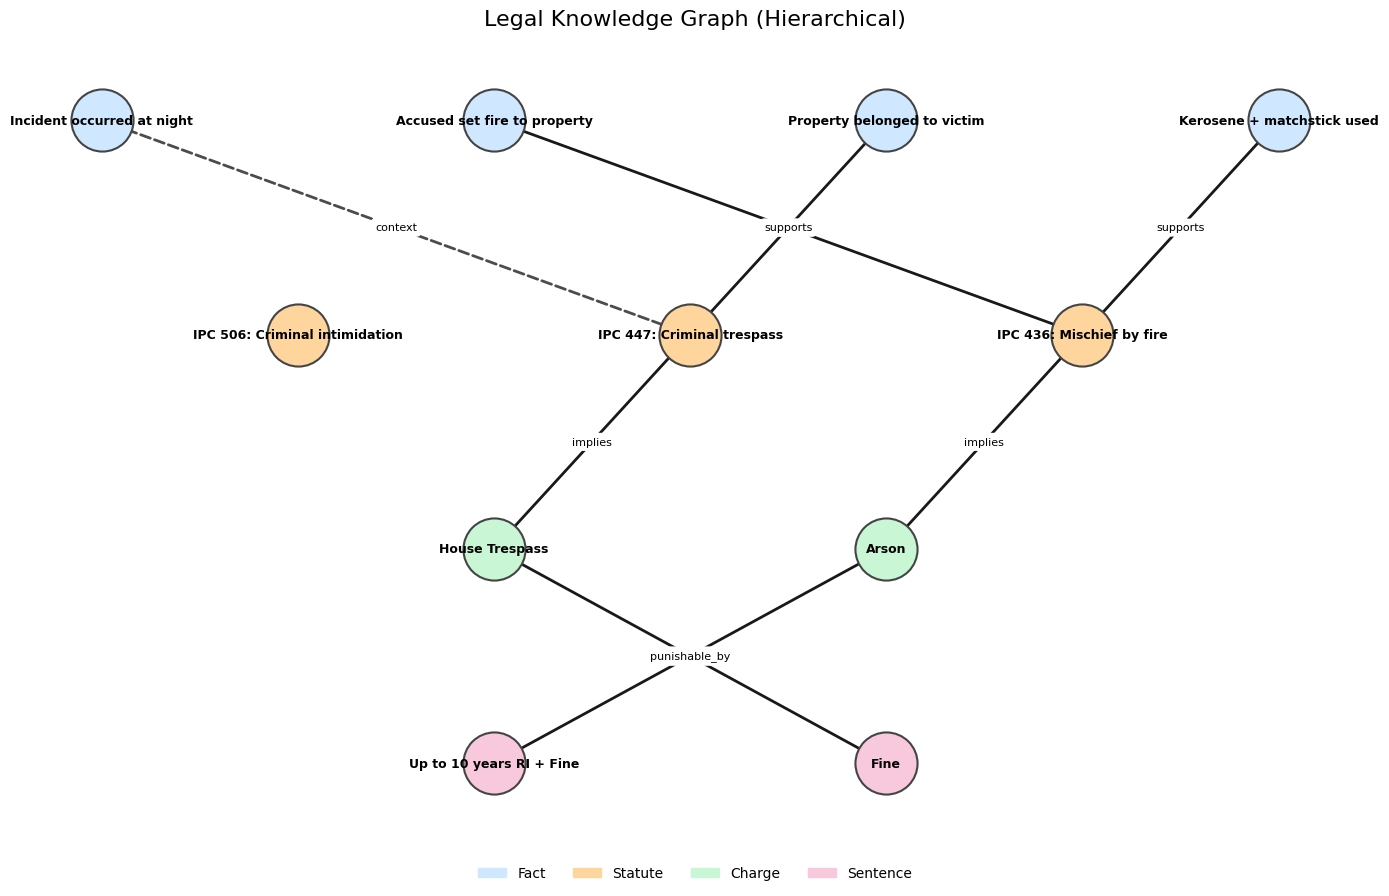

/mnt/data/legal_graph.png


In [31]:
# Improved Legal Knowledge Graph construction and visualization
# - Hierarchical layout (Facts -> Statutes -> Charges -> Sentences)
# - Clear styling, edge labels, legend
# - Works with Graphviz (if available) or falls back to NetworkX layouts
# - Saves an image to /mnt/data/legal_graph.png

import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, Tuple, Optional
import os

# -----------------------------
# 1) Example structured input
# -----------------------------
case = {
    "facts": [
        "Accused set fire to property",
        "Property belonged to victim",
        "Kerosene + matchstick used",
        "Incident occurred at night"
    ],
    "statutes": [
        "IPC 436: Mischief by fire",
        "IPC 447: Criminal trespass",
        "IPC 506: Criminal intimidation"
    ],
    "charges": ["Arson", "House Trespass"],
    "sentences": ["Up to 10 years RI + Fine", "Fine"],
    "relations": [
        ("Accused set fire to property", "IPC 436: Mischief by fire", "supports"),
        ("Property belonged to victim", "IPC 447: Criminal trespass", "supports"),
        ("Kerosene + matchstick used", "IPC 436: Mischief by fire", "supports"),
        ("Incident occurred at night", "IPC 447: Criminal trespass", "context"),
        ("IPC 436: Mischief by fire", "Arson", "implies"),
        ("IPC 447: Criminal trespass", "House Trespass", "implies"),
        ("Arson", "Up to 10 years RI + Fine", "punishable_by"),
        ("House Trespass", "Fine", "punishable_by"),
    ]
}

# -------------------------------------------------
# 2) Build a multi-layer directed acyclic graph DAG
# -------------------------------------------------
def build_legal_graph(data: Dict) -> Tuple[nx.DiGraph, Dict[str, str]]:
    G = nx.DiGraph()
    type_map: Dict[str, str] = {}

    for f in data.get("facts", []):
        G.add_node(f, layer=0, kind="fact"); type_map[f] = "fact"
    for s in data.get("statutes", []):
        G.add_node(s, layer=1, kind="statute"); type_map[s] = "statute"
    for c in data.get("charges", []):
        G.add_node(c, layer=2, kind="charge"); type_map[c] = "charge"
    for p in data.get("sentences", []):
        G.add_node(p, layer=3, kind="sentence"); type_map[p] = "sentence"

    for u, v, rel in data.get("relations", []):
        style = "dashed" if rel in ("context", "weak", "cites") else "solid"
        G.add_edge(u, v, label=rel, style=style)

    return G, type_map

# ------------------------------------
# 3) Hierarchical layout (Graphviz -> fallback)
# ------------------------------------
def layered_layout(G: nx.DiGraph, type_map: Dict[str, str]):
    try:
        from networkx.drawing.nx_agraph import graphviz_layout
        return graphviz_layout(G, prog="dot")  # top→bottom
    except Exception:
        H = G.copy()
        for n, k in type_map.items():
            subset = {"fact":0,"statute":1,"charge":2,"sentence":3}[k]
            H.nodes[n]["subset"] = subset
        raw = nx.multipartite_layout(H, subset_key="subset", scale=2)
        return {n: (y, -x) for n,(x,y) in raw.items()}  # transpose

# ------------------------------------
# 4) Render function
# ------------------------------------
def draw_legal_graph(G: nx.DiGraph, type_map: Dict[str, str],
                     title: str = "Legal Knowledge Graph",
                     save_path: Optional[str]=None):
    color_by_type = {
        "fact": "#CFE8FF", "statute": "#FFD59E",
        "charge": "#C9F7D5", "sentence": "#F8C8DC"
    }
    pos = layered_layout(G, type_map)
    plt.figure(figsize=(14, 9))

    for t in ["fact","statute","charge","sentence"]:
        nodes_t = [n for n,k in type_map.items() if k==t]
        if nodes_t:
            nx.draw_networkx_nodes(
                G, pos, nodelist=nodes_t,
                node_color=color_by_type[t], node_size=2000,
                linewidths=1.5, edgecolors="#444444"
            )

    solid = [(u,v) for u,v,d in G.edges(data=True) if d.get("style","solid")=="solid"]
    dashed = [(u,v) for u,v,d in G.edges(data=True) if d.get("style","solid")=="dashed"]
    nx.draw_networkx_edges(G, pos, edgelist=solid, width=2, alpha=0.9,
                           arrows=True, arrowstyle="-|>", arrowsize=16)
    if dashed:
        nx.draw_networkx_edges(G, pos, edgelist=dashed, width=2, alpha=0.7,
                               style="dashed", arrows=True, arrowstyle="-|>", arrowsize=16)

    nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")
    edge_labels = {(u,v): d.get("label","") for u,v,d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                 font_size=8, label_pos=0.5, rotate=False)

    import matplotlib.patches as mpatches
    legend = [
        mpatches.Patch(color=color_by_type["fact"], label="Fact"),
        mpatches.Patch(color=color_by_type["statute"], label="Statute"),
        mpatches.Patch(color=color_by_type["charge"], label="Charge"),
        mpatches.Patch(color=color_by_type["sentence"], label="Sentence"),
    ]
    plt.legend(handles=legend, loc="lower center", ncol=4, frameon=False, bbox_to_anchor=(0.5, -0.08))
    plt.title(title, fontsize=16, pad=20)
    plt.axis("off")
    plt.tight_layout()
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=180, bbox_inches="tight")
    plt.show()

# ------------------------------------
# 5) Build, draw, save
# ------------------------------------
G, type_map = build_legal_graph(case)
out_path = "/mnt/data/legal_graph.png"
draw_legal_graph(G, type_map, title="Legal Knowledge Graph (Hierarchical)", save_path=out_path)
print(out_path)
